# Importing and Reading Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [3]:
df.describe().to_csv("Descriptive Analysis.csv")

In [4]:
corrMatrix = df.corr()

In [5]:
print(corrMatrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

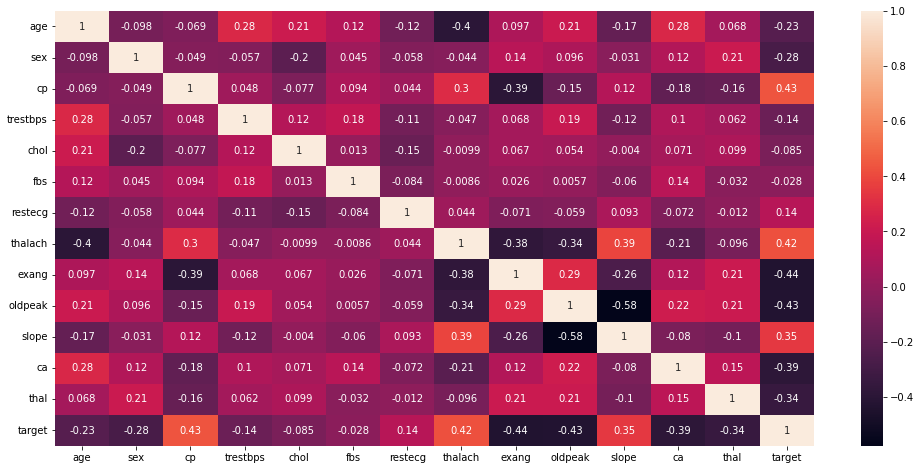

In [6]:
plt.figure(figsize = (17,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [2]:
# --- Creating Dummy Variables for cp, thal and slope ---
cp = pd.get_dummies(df['cp'], prefix='cp')
thal = pd.get_dummies(df['thal'], prefix='thal')
slope = pd.get_dummies(df['slope'], prefix='slope')

# --- Merge Dummy Variables to Main Data Frame ---
frames = [df, cp, thal, slope]
df = pd.concat(frames, axis = 1)
# --- Drop Unnecessary Variables ---
df = df.drop(columns = ['cp', 'thal', 'slope'])

In [3]:
X = df.drop(['target'], axis=1)
y = df['target']

In [4]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

# Model Building

In [6]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# SVM

In [7]:
SVMclassifier = SVC()
SVMclassifier.fit(x_train, y_train)

y_pred_SVM = SVMclassifier.predict(x_test)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        25
           1       0.97      0.83      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.90      0.88        61
weighted avg       0.90      0.89      0.89        61

.:. Support Vector Machine Accuracy: 88.52% .:.


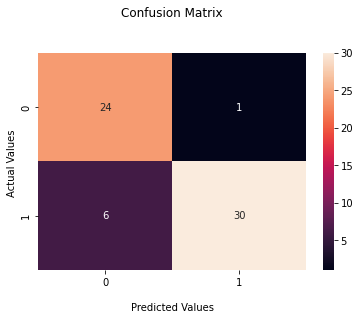

In [8]:
# print classification report
print(classification_report(y_test, y_pred_SVM))

#--- SVM Accuracy ---
SVMAcc = accuracy_score(y_pred_SVM, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(SVMAcc*100)+' .:.')

# --- SVM Confusion Matrix ---
cf_matrix = confusion_matrix(y_test, y_pred_SVM)

ax = sns.heatmap(cf_matrix, annot=True)

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
#ax.xaxis.set_ticklabels(['Positive','Negative'])
#ax.yaxis.set_ticklabels(['Positive','Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

# plt.tight_layout();

# Hyper Parameter Tuning

In [9]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
#parameter grid takes a dictionary containg list of values of each hyperparameter
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf','linear'],
'max_iter': [1000,1200,1400,1600]} 
grid = GridSearchCV(SVC(), param_grid,cv=10, refit = True, verbose = 1)
# fitting the model for grid search
grid.fit(x_train, y_train)
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
#output
#SVC(C=100, gamma=0.0001)
#testing the model
grid_predictions = grid.predict(x_test)
print(classification_report(y_test, grid_predictions))
GRIDSVMAcc = accuracy_score(grid_predictions, y_test)
print('.:. Support Vector Machine Accuracy:'+'\033[1m {:.2f}%'.format(GRIDSVMAcc*100)+' .:.')

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
{'C': 10, 'gamma': 1, 'kernel': 'linear', 'max_iter': 1000}
SVC(C=10, gamma=1, kernel='linear', max_iter=1000)
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        25
           1       0.97      0.89      0.93        36

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61

.:. Support Vector Machine Accuracy: 91.80% .:.


In [35]:
print(grid.score(x_train, y_train))

0.8264462809917356


In [ ]:
pd.DataFrame({'Actual' : y_test, 'Predicted' : grid_predictions})

,Actual,Predicted
113,1,1
249,0,0
18,1,1
142,1,1
299,0,0
...,...,...
64,1,1
133,1,1
204,0,0
180,0,0


In [ ]:
gridSearchResults = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

In [18]:
results = pd.DataFrame(grid.cv_results_)
results.to_csv('result.csv')

In [19]:
 test = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["split8_test_score"], columns=["Accuracy"])],axis=1)

In [20]:
test

,C,gamma,kernel,max_iter,Accuracy
0,0.1,1.0000,rbf,1000,0.750000
1,0.1,1.0000,rbf,1200,0.750000
2,0.1,1.0000,rbf,1400,0.750000
3,0.1,1.0000,rbf,1600,0.750000
4,0.1,1.0000,linear,1000,0.916667
...,...,...,...,...,...
195,1000.0,0.0001,rbf,1600,0.916667
196,1000.0,0.0001,linear,1000,0.291667
197,1000.0,0.0001,linear,1200,0.875000
198,1000.0,0.0001,linear,1400,0.458333


In [21]:
test.sort_values('Accuracy')

,C,gamma,kernel,max_iter,Accuracy
196,1000.0,0.0001,linear,1000,0.291667
188,1000.0,0.0010,linear,1000,0.291667
180,1000.0,0.0100,linear,1000,0.291667
172,1000.0,0.1000,linear,1000,0.291667
164,1000.0,1.0000,linear,1000,0.291667
...,...,...,...,...,...
98,10.0,0.0100,rbf,1400,0.916667
22,0.1,0.0100,linear,1400,0.916667
100,10.0,0.0100,linear,1000,0.916667
94,10.0,0.1000,linear,1400,0.916667


<AxesSubplot:xlabel='gamma', ylabel='Accuracy'>

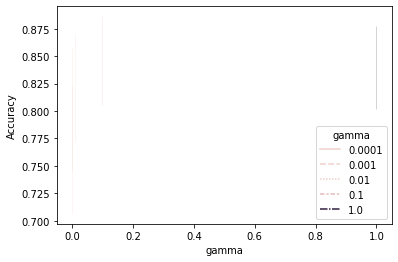

In [28]:
sns.lineplot(
    data=test, x="gamma", y="Accuracy", hue="gamma", style="gamma")

In [25]:
test.to_csv("GridSearch.csv")

In [38]:
grid.best_score_

0.8149999999999998